In [164]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [166]:
data = pd.read_excel("Motor Trend Car Road Tests.xlsx")
data

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [168]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


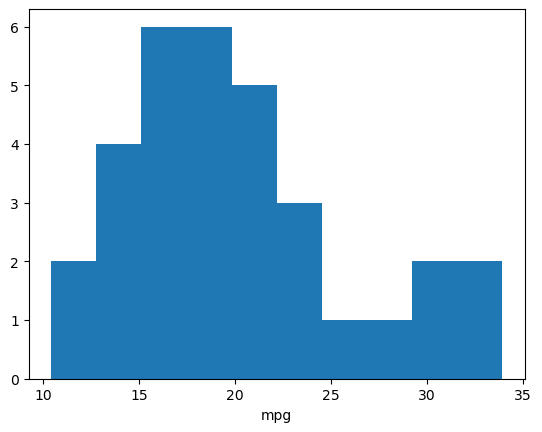

In [169]:
plt.hist(data['mpg'])
plt.xlabel('mpg')
plt.show()

In [171]:
X = data.drop(columns = ["mpg","model"])
y = data["mpg"]

In [174]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.4,           # 40% para test
    train_size=0.6,          # 60% para train
    random_state=137,         # Semilla para reproducibilidad
    shuffle=True             # Mezclar los datos antes de dividir
)

print(f"Train set: {X_train.shape[0]} muestras")
print(f"Test set: {X_test.shape[0]} muestras")


Train set: 19 muestras
Test set: 13 muestras


### Escalar solo x_train y x_test

In [177]:
scaler_X = StandardScaler()

# Ajustar el scaler solo con training data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

### Modelar

In [180]:
n = len(y_train)
ones = np.ones([n,1])
X = np.hstack([ones,X_train_scaled])

In [182]:
ols = sm.OLS(y_train, X)
results = ols.fit()
results.summary()

C:\Users\dayan\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     5.802
Date:                Mon, 08 Sep 2025   Prob (F-statistic):             0.0101
Time:                        17:54:22   Log-Likelihood:                -40.712
No. Observations:                  19   AIC:                             103.4
Df Residuals:                       8   BIC:                             113.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4947      0.729     25.366      0.000      16.813      20.176
x1            -2.8779      3.427     -0.840      0.425     -10.781       5.025
x2            -0.9201      3.625     -0.254      0.806      -9.280       7.440
x3             0.1825      2.839      0.064      0.950      -6.363       6.728
x4             0.2609      1.492      0.175      0.865      -3.179       3.701
x5            -2.1215      3.207     -0.662      0.527      -9.517       5.274
x6             0.1404      1.998      0.070      0.946      -4.468       4.749
x7            -0.6393      2.275     -0.281      0.786      -5.884       4.606
x8             0.3812      1.705      0.224      0.829      -3.550       4.312
x9            -0.1370      2.167     -0.063      0.951      -5.134       4.860
x10           -0.6824      2.324     -0.294      0.776      -6.041       4.676
==============================================================================
Omnibus:                        3.180   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                1.324
Skew:                           0.480   Prob(JB):                        0.516
Kurtosis:                       3.867   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
n = len(y_test)
ones = np.ones([n,1])
X = np.hstack([ones,X_test_scaled])

y_pred=results.predict(X_e_test)
r2_score(y_test,y_pred)

0.6781478185882254